In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import plotly.express as px

In [5]:
df = pd.read_excel('/content/Airbnb_Open_Data.xlsx')

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [36]:
df.duplicated().value_counts()
df.dropna()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,...,2018.0,822.0,164.0,1.0,9.0,2019-04-25,0.91,3.0,1.0,0.0
102030,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,...,2015.0,455.0,91.0,4.0,36.0,2018-06-27,1.28,1.0,1.0,0.0
102031,57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,...,2020.0,1078.0,216.0,1.0,58.0,2019-06-10,2.08,5.0,2.0,120.0
102032,57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,...,2007.0,103.0,21.0,7.0,40.0,2019-06-23,1.51,1.0,5.0,148.0


In [37]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

,count
False,102058


In [ ]:
df.drop(['license', 'house_rules'], inplace=True, axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

In [44]:
df['price'] = df['price'].replace('$', '',regex=False)
df['price'] = df['price'].replace(',', '')
df['price'] = df['price'].astype(float)

In [45]:
df['service fee'] = df['service fee'].replace('$', '',regex=False)
df['price'] = df['price'].replace(',', '')
df['price'] = df['price'].astype(float)

In [46]:
df.rename(columns = {
    'service fee': 'service_fee_$',
    'price': 'price_$'
}, inplace=True)

In [47]:
df['id'] = df['id'].astype('float')
df['host id'] = df['host id'].astype('float')
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype('float')

In [49]:
df.loc[df['neighbourhood group'] == 'Brookln', 'neighbourhood group'] = 'Brooklyn'

In [51]:
df = df.drop(df[df['availability 365'] > 500].index)

In [53]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020570e+05,1.020570e+05,102049.000000,102049.000000,101952.000000,101843.000000,101810.000000,101784.000000,101657.000000,101874.000000,86225,86239.000000,101738.000000,101738.000000,101609.000000
mean,2.918427e+07,4.926729e+10,40.728097,-73.949652,0.497940,2012.488124,625.350074,125.038149,8.126691,27.515941,2019-06-11 02:12:21.084372224,1.375387,3.278716,7.937005,141.009192
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.509272e+07,2.459916e+10,40.688730,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.918410e+07,4.912811e+10,40.722290,-73.954440,0.000000,2012.000000,624.500000,125.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.327604e+07,7.400636e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000
std,1.627177e+07,2.853754e+10,0.055852,0.049502,0.499998,5.765855,331.669624,66.325303,30.616844,49.567848,NaN,1.748018,1.285084,32.266507,134.974755


In [63]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53428
Private room,46306
Shared room,2208
Hotel room,115


Text(0.5, 1.0, 'Room Type Distribution')

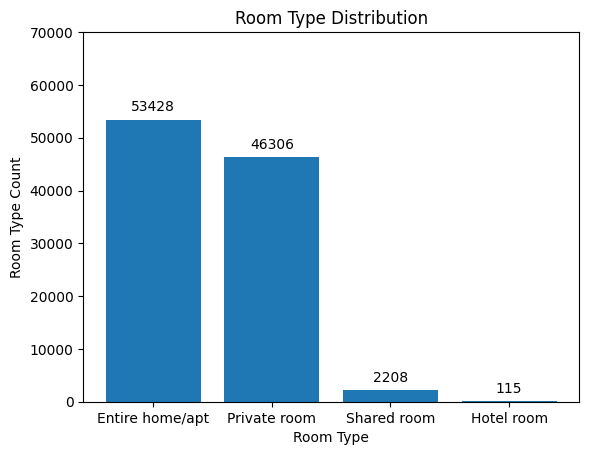

In [67]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"])
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding=4)
plt.ylim([0, 70000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Room Type Distribution')

In [76]:
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43557
Brooklyn,41631
Queens,13197
Bronx,2694
Staten Island,949


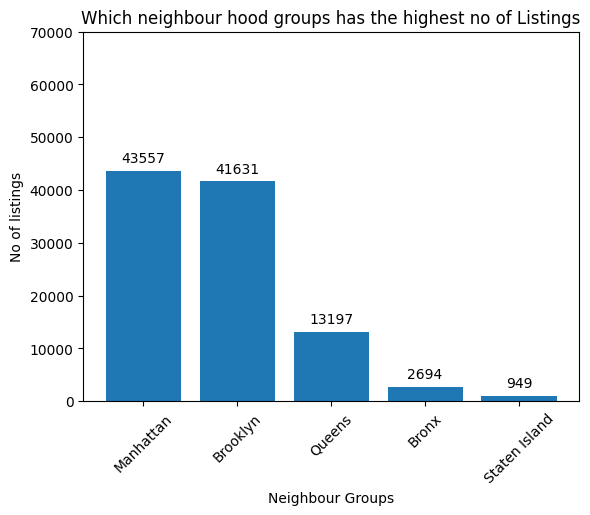

In [77]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding=4)
plt.ylim([0, 70000])
plt.xlabel('Neighbour Groups')
plt.ylabel('No of listings')
plt.xticks(rotation = 45)
plt.title('Which neighbour hood groups has the highest no of Listings')
plt.show()

Text(0.5, 1.0, 'Which neighbour hood groups has the highest average price')

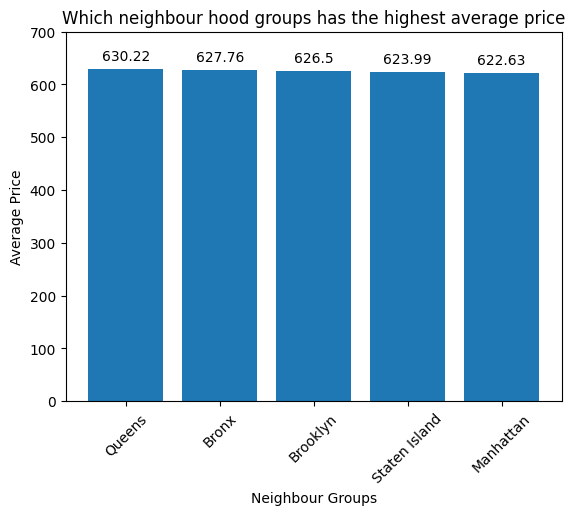

In [81]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, "price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"],2), label_type= "edge", padding=4);
plt.ylim([0,700])
plt.xlabel('Neighbour Groups')
plt.ylabel('Average Price')
plt.xticks(rotation = 45)
plt.title('Which neighbour hood groups has the highest average price')

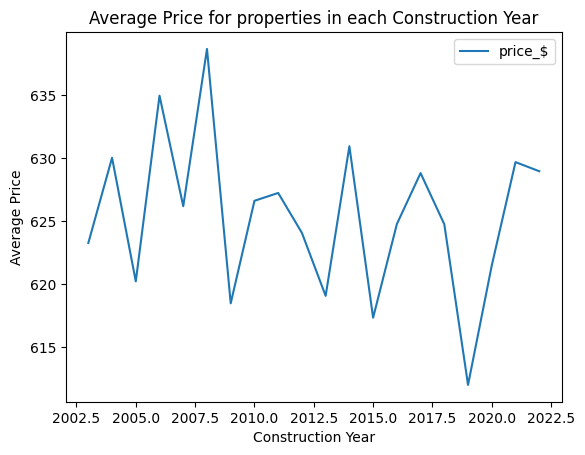

In [86]:
df.groupby(df['Construction Year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price');
plt.title('Average Price for properties in each Construction Year');

(0.0, 20000.0)

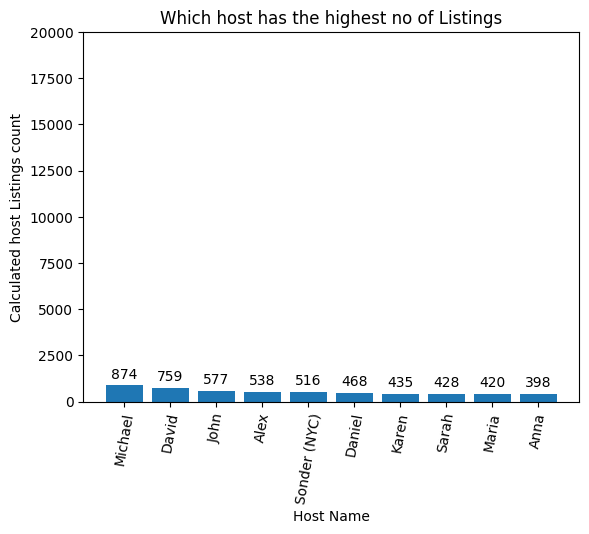

In [96]:
hosts = df.groupby('host name')['calculated host listings count'].count().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type= 'edge', padding=3);
plt.xlabel('Host Name')
plt.ylabel('Calculated host Listings count')
plt.xticks(rotation = 80)
plt.title('Which host has the highest no of Listings')
plt.ylim([0, 20000])

In [102]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False)
review

,review rate number
host_identity_verified,
verified,3.285641
unconfirmed,3.272033


Text(0.5, 1.0, 'Average Review Rate for Verified and Unverified Hosts')

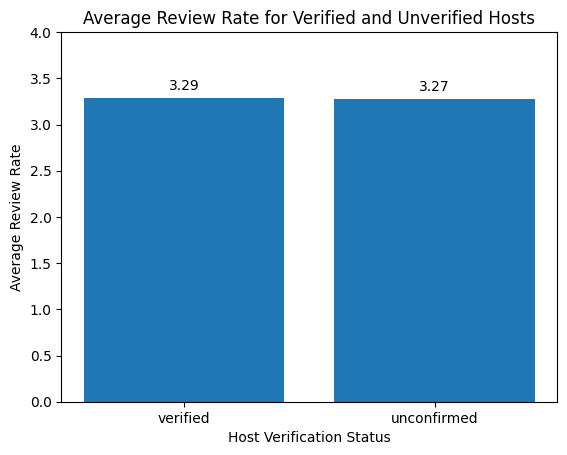

In [106]:
review_bar = plt.bar(review.index, review.values);
plt.bar_label(review_bar, labels = [round(val, 2) for val in review.values], padding=4);
plt.ylim([0,4])
plt.xlabel("Host Verification Status")
plt.ylabel("Average Review Rate")
plt.title("Average Review Rate for Verified and Unverified Hosts")

Text(0.5, 1.0, 'Avg review rate for each verified ones')

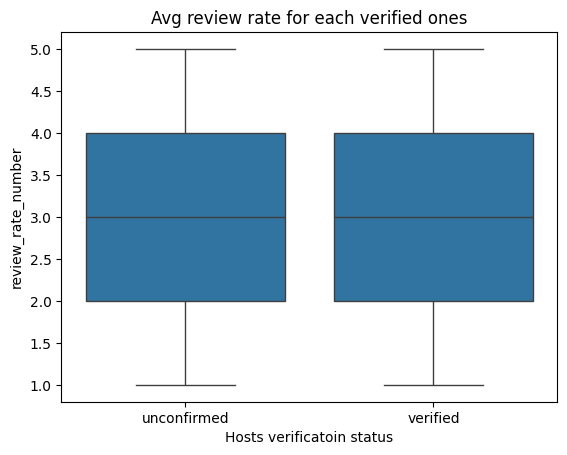

In [108]:
base_color = sn.color_palette()[0]
sn.boxplot(data = df , x = 'host_identity_verified', y = 'review rate number', color = base_color)
plt.xlabel('Hosts verificatoin status')
plt.ylabel('review_rate_number')
plt.title("Avg review rate for each verified ones")

In [109]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999908752435218)

Text(0.5, 1.0, 'Price vs Service Fee')

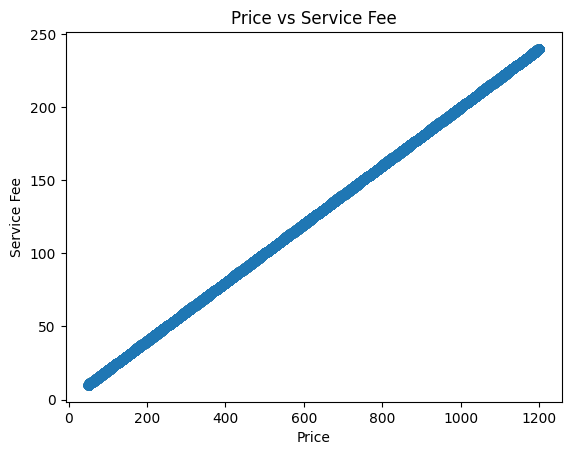

In [111]:
sn.regplot(data = df, x = 'price_$', y = 'service_fee_$')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.title('Price vs Service Fee')

In [113]:
ARNN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARNN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346154
                    Private room               3.326873
                    Shared room                3.260870
Brooklyn            Entire home/apt            3.249963
                    Hotel room                 3.857143
                    Private room               3.263716
                    Shared room                3.334957
Manhattan           Entire home/apt            3.275803
                    Hotel room                 3.500000
                    Private room               3.277431
                    Shared room                3.254199
Queens              Entire home/apt            3.349306
                    Hotel room                 3.750000
                    Private room               3.315584
                    Shared room                3.369748
Staten Island       Entire home/apt            3.329087
                    Private room               3.477024
                    Shared room                3.533333

Text(0.5, 1.0, 'Review Rate Number by Neighbourhood Group and Room Type')

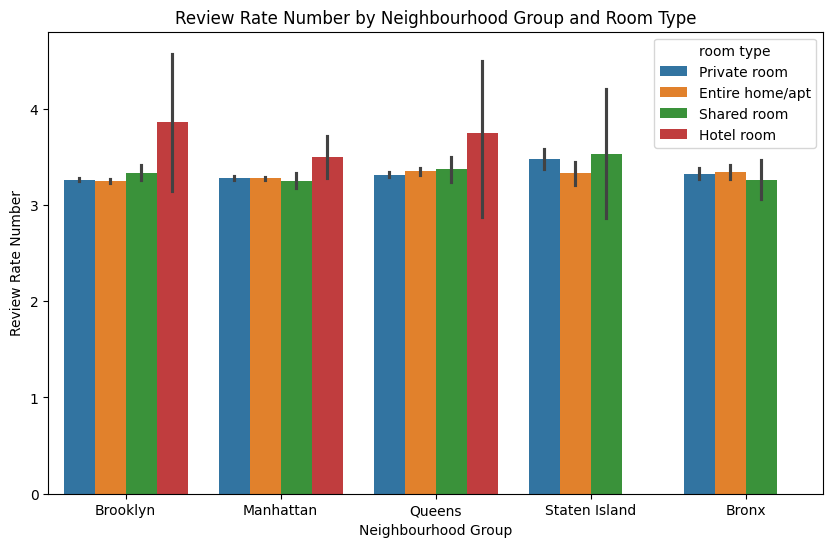

In [115]:
plt.figure(figsize = (10, 6))
sn.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Number by Neighbourhood Group and Room Type')

Text(0.5, 1.0, 'Calculated Hosts Listings vs Availability 365')

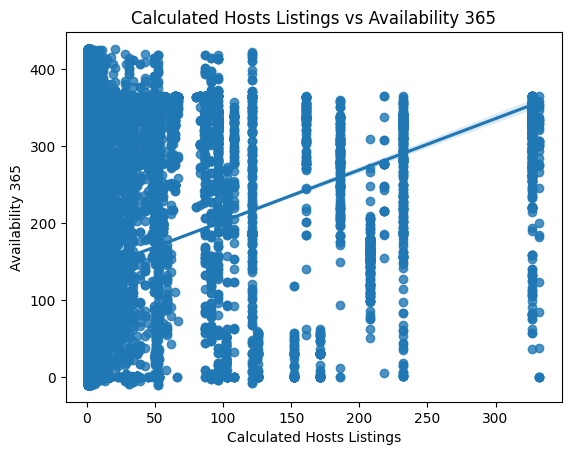

In [118]:
sn.regplot(data = df, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated Hosts Listings')
plt.ylabel('Availability 365')
plt.title('Calculated Hosts Listings vs Availability 365')

In [119]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.15959891314313554)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102057 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102057 non-null  float64       
 1   NAME                            101787 non-null  object        
 2   host id                         102057 non-null  float64       
 3   host_identity_verified          101768 non-null  object        
 4   host name                       101651 non-null  object        
 5   neighbourhood group             102028 non-null  object        
 6   neighbourhood                   102041 non-null  object        
 7   lat                             102049 non-null  float64       
 8   long                            102049 non-null  float64       
 9   country                         101525 non-null  object        
 10  country code                    101926 non-null  object      